# clean

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

appointments = pd.read_csv("appointments_raw.csv")

In [13]:
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### rename columns to be more legible

In [14]:
appointments = appointments.rename(index=str, columns={
    'PatientId': 'patient_id',
    'AppointmentID': 'appointment_id',
    'Gender': 'gender',
    'ScheduledDay': 'scheduled_day',
    'AppointmentDay': 'appointment_day',
    'Age': 'age',
    'Neighbourhood': 'neighborhood',
    'Scholarship': 'scholarship',
    'Hipertension': 'hypertension',
    'Diabetes': 'diabetes',
    'Alcoholism': 'alcoholism',
    'Handcap': 'handicap',
    'SMS_received': 'sms_received',
    'No-show': 'no_show'
})

### reset index to appointment id

In [15]:
appointments = appointments.set_index('appointment_id')

### convert fields to proper formats

In [16]:
# scheduled_day and appointment_day need to be datetime values
date_format = '%Y-%m-%dT%H:%M:%SZ'
appointments['scheduled_day'] = pd.to_datetime(appointments['scheduled_day'],format=date_format)
appointments['appointment_day'] = pd.to_datetime(appointments['appointment_day'],format=date_format)
appointments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 5642903 to 5629448
Data columns (total 13 columns):
patient_id         110527 non-null float64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighborhood       110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(7), object(3)
memory usage: 11.8+ MB


In [17]:
# replace no-show with binary
appointments['no_show'] = appointments['no_show'].map({
    'Yes': 1,
    'No': 0
})

### skim columns for irregularities

In [18]:
for column in appointments.columns:
    print('\n',column)
    display(appointments[column].value_counts().head(3))
    


 patient_id


8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
Name: patient_id, dtype: int64


 gender


F    71840
M    38687
Name: gender, dtype: int64


 scheduled_day


2016-05-06 07:09:54    24
2016-05-06 07:09:53    23
2016-04-25 17:18:27    22
Name: scheduled_day, dtype: int64


 appointment_day


2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
Name: appointment_day, dtype: int64


 age


0     3539
1     2273
52    1746
Name: age, dtype: int64


 neighborhood


JARDIM CAMBURI    7717
MARIA ORTIZ       5805
RESISTÊNCIA       4431
Name: neighborhood, dtype: int64


 scholarship


0    99666
1    10861
Name: scholarship, dtype: int64


 hypertension


0    88726
1    21801
Name: hypertension, dtype: int64


 diabetes


0    102584
1      7943
Name: diabetes, dtype: int64


 alcoholism


0    107167
1      3360
Name: alcoholism, dtype: int64


 handicap


0    108286
1      2042
2       183
Name: handicap, dtype: int64


 sms_received


0    75045
1    35482
Name: sms_received, dtype: int64


 no_show


0    88208
1    22319
Name: no_show, dtype: int64

In [19]:
appointments.describe()

,patient_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


age
* minimum age is -1; remove

In [20]:
appointments = appointments[appointments['age']>=0]

### find irregularities in distributions

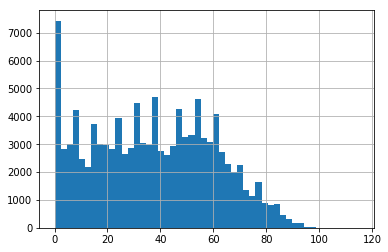

In [21]:
appointments['age'].hist(bins=50) 

this distribution of ages looks normal for a city population.
* the peak at 0 can be explained by babies being born or having health issues.

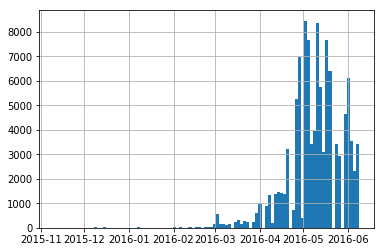

In [22]:
appointments['scheduled_day'].hist(bins=100)

the dataset spans 7 months, but most of the data was collected in the last 2 months
* this doesn't look erroneous, but it could cause problems
* why is there so little data for the first few months?

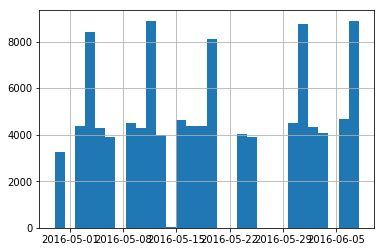

In [23]:
appointments['appointment_day'].hist(bins=30)

so our data was sampled based on appointment day, which only spends a few months
* this explains the scheduled day phenomena of sparsity

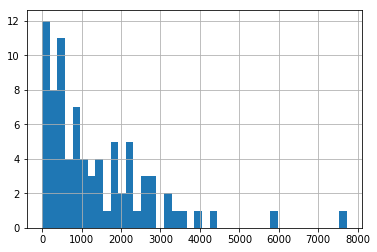

In [24]:
appointments['neighborhood'].value_counts().hist(bins=40)

In [25]:
appointments['handicap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

### export to csv

In [26]:
appointments.to_csv('appointments_clean.csv')